In [3]:
!pip install tensorflow



   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/376.0 MB 11.8 MB/s eta 0:00:32
   ---------------------------------------- 4.2/376.0 MB 11.4 MB/s eta 0:00:33
    --------------------------------------- 5.2/376.0 MB 9.7 MB/s eta 0:00:39
    --------------------------------------- 6.3/376.0 MB 7.9 MB/s eta 0:00:47
    --------------------------------------- 8.1/376.0 MB 7.9 MB/s eta 0:00:47
   - -------------------------------------- 10.0/376.0 MB 8.0 MB/s eta 0:00:46
   - -------------------------------------- 12.1/376.0 MB 8.4 MB/s eta 0:00:44
   - -------------------------------------- 13.9/376.0 MB 8.4 MB/s eta 0:00:44
   - -------------------------------------- 15.7/376.0 MB 8.5 MB/s eta 0:00:43
   - -------------------------------------- 17.6/376.0 MB 8.5 MB/s eta 0:00:43
   -- ------------------------------------- 19.4/376.0 MB 8.6 MB/s eta 0:00:42
   -- ------------------------------------- 21.2/376.0 MB 8.6 M

In [5]:
# 📦 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [7]:
# 📥 Step 2: Load Dataset
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")


In [9]:
# 🔍 Step 3: Explore the Dataset
print(train_df.shape)
print(train_df.head())


(27455, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206      

In [11]:
# 🎯 Step 4: Separate Features and Labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values


In [13]:
# 🔄 Step 5: Reshape and Normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0


In [15]:
# 🔢 Step 6: One-hot Encode Labels
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)


In [17]:
# 🧠 Step 7: Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(25, activation='softmax')
])


C:\Users\anujk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# ⚙️ Step 8: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
# 🚀 Step 9: Train the Model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3987 - loss: 2.0158 - val_accuracy: 0.8398 - val_loss: 0.4699
Epoch 2/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9130 - loss: 0.2755 - val_accuracy: 0.9060 - val_loss: 0.3317
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9648 - loss: 0.1099 - val_accuracy: 0.9144 - val_loss: 0.3062
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9776 - loss: 0.0723 - val_accuracy: 0.9032 - val_loss: 0.3565
Epoch 5/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9851 - loss: 0.0449 - val_accuracy: 0.9023 - val_loss: 0.3810


In [23]:
# 📈 Step 10: Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8976 - loss: 0.3853
Test Accuracy: 90.23%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Label: 6


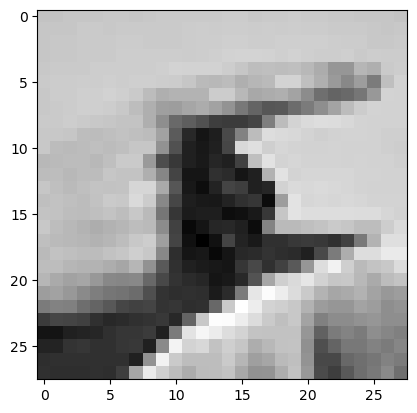

In [25]:
# 🖼️ Step 11: Predict a Sample Image
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
pred = model.predict(np.expand_dims(X_test[0], axis=0))
predicted_class = np.argmax(pred)
print(f"Predicted Label: {predicted_class}")


In [27]:
model.save("asl_model.h5")


In [29]:
import string

classes = list(string.ascii_uppercase)
classes.remove('J')

sample = X_test[0].reshape(1,28,28,1)
pred = model.predict(sample)
predicted_index = np.argmax(pred)
print("Predicted Letter:", classes[predicted_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Letter: G
